In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv(r"D:\msc research\data\csv files\moonkil_full.csv")

df['total_holidays_weekly']=df['Holidays on weekdays']+df['Holidays on weekends']
df['Profit per unit']=df['Profit']/df['item_Qty']

df['S_Date'] = df['S_Date'].astype('datetime64[ns]')
df=df[(df['S_Date'] > '2016-06-01') & (df['S_Date'] < '2020-01-01')]

df.tail()


,S_Invoice_No,item_Code,description,item_Qty,S_Date,Purchases_price,Sale_Price,Profit,Holidays on weekdays,Holidays on weekends,Hindu/Christ holidays,total_holidays_weekly,Profit per unit
917810,191231308.0,C55,BOOK,1.0,2019-12-31,25.0,60.0,35.0,0,0,0,0,35.0
917811,191231308.0,H1,PADDIJAPPA,1.0,2019-12-31,30.0,50.0,20.0,0,0,0,0,20.0
917812,191231308.0,KA04,KADALA - M,1.0,2019-12-31,178.0,195.0,17.0,0,0,0,0,17.0
917813,191231309.0,1000000783,SOBIN BAG - 5KG,1.0,2019-12-31,255.0,290.0,35.0,0,0,0,0,35.0
917814,191231309.0,4.80E+12,SUPOSHA - 750G,2.0,2019-12-31,199.0,220.0,42.0,0,0,0,0,21.0


In [5]:
dfa=df.loc[df['description']=='KOWPI']
dfa=dfa.drop(['S_Invoice_No','item_Code','description','description'], axis = 1)

x=dfa.set_index('S_Date').resample('W-Sun')['Sale_Price'].mean().reset_index()
df_k= pd.DataFrame(x)
df_k.rename(columns={'Sale_Price': 'Kowpi_Sale_price'}, inplace=True)

y = dfa.set_index('S_Date').resample('W-Sun')['item_Qty'].sum()
dfz= pd.DataFrame(y)
dfz.rename(columns={'item_Qty': 'Kowpi_total_sales'}, inplace=True)

df_k['Kowpi_total_item_Qty'] = dfz['Kowpi_total_sales'].values

df_k['Kowpi_weeksbefore_sale'] = df_k['Kowpi_total_item_Qty'].shift(1)
df_k['Kowpi_2weeksbefore_sale'] = df_k['Kowpi_total_item_Qty'].shift(2)
df_k['Kowpi_3weeksbefore_sale'] = df_k['Kowpi_total_item_Qty'].shift(3)
df_k['Kowpi_4weeksbefore_sale'] = df_k['Kowpi_total_item_Qty'].shift(4)

df_k['Kowpi_last2weeks_totalsale']=df_k.Kowpi_total_item_Qty.rolling(window=2).sum().shift(1)
df_k['Kowpi_last3weeks_totalsale'] = df_k.Kowpi_total_item_Qty.rolling(window=3).sum().shift(1)
df_k['Kowpi_lastmonth_totalsale'] = df_k.Kowpi_total_item_Qty.rolling(window=4).sum().shift(1)

df_k['Kowpi_weekbefore_price'] = df_k['Kowpi_Sale_price'].shift(1)
df_k['Kowpi_5weekbefore_price'] = df_k['Kowpi_Sale_price'].shift(5)
df_k['Kowpi_3weekbefore_price'] = df_k['Kowpi_Sale_price'].shift(3)
df_k['Kowpi_2weekbefore_price'] = df_k['Kowpi_Sale_price'].shift(2)
df_k['Kowpi_4weekbefore_price'] = df_k['Kowpi_Sale_price'].shift(4)

df_k.tail()


,S_Date,Kowpi_Sale_price,Kowpi_total_item_Qty,Kowpi_weeksbefore_sale,Kowpi_2weeksbefore_sale,Kowpi_3weeksbefore_sale,Kowpi_4weeksbefore_sale,Kowpi_last2weeks_totalsale,Kowpi_last3weeks_totalsale,Kowpi_lastmonth_totalsale,Kowpi_weekbefore_price,Kowpi_5weekbefore_price,Kowpi_3weekbefore_price,Kowpi_2weekbefore_price,Kowpi_4weekbefore_price
179,2019-12-08,255.000000,16.600,18.200,13.735,24.585,32.900,31.935,56.520,89.42,255.000000,255.0,255.0,255.0,255.0
180,2019-12-15,255.000000,24.115,16.600,18.200,13.735,24.585,34.800,48.535,73.12,255.000000,255.0,255.0,255.0,255.0
181,2019-12-22,255.000000,29.215,24.115,16.600,18.200,13.735,40.715,58.915,72.65,255.000000,255.0,255.0,255.0,255.0
182,2019-12-29,256.111111,10.700,29.215,24.115,16.600,18.200,53.330,69.930,88.13,255.000000,255.0,255.0,255.0,255.0
183,2020-01-05,260.000000,3.350,10.700,29.215,24.115,16.600,39.915,64.030,80.63,256.111111,255.0,255.0,255.0,255.0


<AxesSubplot:title={'center':'weekly sales Anchor'}>

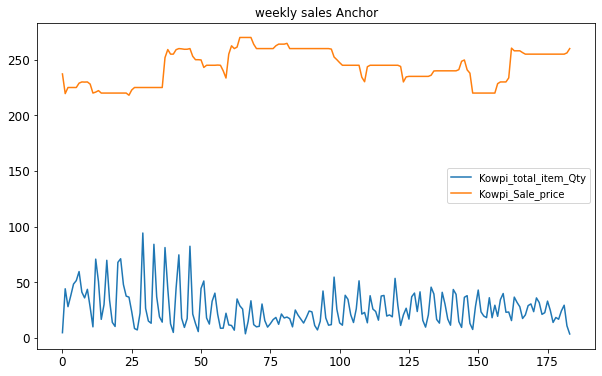

In [6]:
df_k[['Kowpi_total_item_Qty','Kowpi_Sale_price']].plot(figsize=(10,6), fontsize=12, title='weekly sales Anchor')

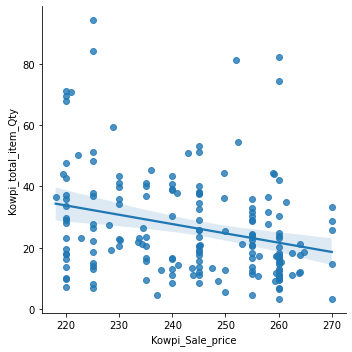

In [7]:
sns.lmplot(y='Kowpi_total_item_Qty', x='Kowpi_Sale_price',data=df_k[['Kowpi_total_item_Qty','Kowpi_Sale_price']])

In [8]:
dfa=df.loc[df['description']=='LANKASOY - 90G']
dfa=dfa.drop(['S_Invoice_No','item_Code','description','Profit','description','Purchases_price'], axis = 1)
dfa['S_Date'] = dfa['S_Date'].astype('datetime64[ns]')

x=dfa.set_index('S_Date').resample('W-Sun')['Sale_Price'].mean()
df_soy= pd.DataFrame(x)
df_soy.rename(columns={'Sale_Price':'soy_Sale_price'}, inplace=True)

ze=dfa.set_index('S_Date').resample('W-Sun')['item_Qty'].sum()
dfzze= pd.DataFrame(ze)
dfzze.rename(columns={'item_Qty':'soy_total_item_Qty'}, inplace=True)

df_soy['soy_total_item_Qty'] = dfzze['soy_total_item_Qty'].values
df_soy['soy_total_item_Qty']=df_soy['soy_total_item_Qty'].shift(1)
print(df_soy.shape)
df_soy.tail()

(184, 2)


,soy_Sale_price,soy_total_item_Qty
S_Date,,
2019-12-08,65.0,4.0
2019-12-15,65.0,5.0
2019-12-22,65.0,7.0
2019-12-29,65.0,6.0
2020-01-05,65.0,19.0


In [11]:
dfa=df.loc[df['description']=='KADALA']
dfa=dfa.drop(['S_Invoice_No','item_Code','description','Profit','description','Purchases_price'], axis = 1)
dfa['S_Date'] = dfa['S_Date'].astype('datetime64[ns]')

x=dfa.set_index('S_Date').resample('W-Sun')['Sale_Price'].mean()
df_kadala= pd.DataFrame(x)
df_kadala.rename(columns={'Sale_Price':'kadala_Sale_price'}, inplace=True)

ze=dfa.set_index('S_Date').resample('W-Sun')['item_Qty'].sum()
dfzze= pd.DataFrame(ze)
dfzze.rename(columns={'item_Qty':'kadala_total_item_Qty'}, inplace=True)

df_kadala['kadala_total_item_Qty'] = dfzze['kadala_total_item_Qty'].values
df_kadala['kadala_total_item_Qty']=df_kadala['kadala_total_item_Qty'].shift(1)
print(df_kadala.shape)
df_kadala.tail()

(121, 2)


,kadala_Sale_price,kadala_total_item_Qty
S_Date,,
2018-09-23,220.000000,52.450
2018-09-30,220.000000,45.215
2018-10-07,220.000000,26.000
2018-10-14,219.181818,21.800
2018-10-21,219.888889,45.750


In [14]:
dfa=df.loc[df['description']=='GREEN GRAN']
dfa=dfa.drop(['S_Invoice_No','item_Code','description','Profit','description','Purchases_price'], axis = 1)
dfa['S_Date'] = dfa['S_Date'].astype('datetime64[ns]')

x=dfa.set_index('S_Date').resample('W-Sun')['Sale_Price'].mean()
df_gran= pd.DataFrame(x)
df_gran.rename(columns={'Sale_Price':'fran_Sale_price'}, inplace=True)

ze=dfa.set_index('S_Date').resample('W-Sun')['item_Qty'].sum()
dfzze= pd.DataFrame(ze)
dfzze.rename(columns={'item_Qty':'gran_total_item_Qty'}, inplace=True)

df_gran['gran_total_item_Qty'] = dfzze['gran_total_item_Qty'].values
df_gran['gran_total_item_Qty']=df_gran['gran_total_item_Qty'].shift(1)
print(df_gran.shape)
df_gran.head()

(184, 2)


,fran_Sale_price,gran_total_item_Qty
S_Date,,
2016-07-03,209.000000,NaN
2016-07-10,212.520000,7.50
2016-07-17,198.000000,49.75
2016-07-24,209.200000,37.50
2016-07-31,214.782609,60.95


In [ ]:
dfa=df.loc[df['description']=='RED NADU']
dfa=dfa.drop(['S_Invoice_No','item_Code','description','description'], axis = 1)
dfa['S_Date'] = dfa['S_Date'].astype('datetime64[ns]')

x=dfa.set_index('S_Date').resample('W-Sun')['Sale_Price'].mean()
df_nadu= pd.DataFrame(x)
df_nadu.rename(columns={'Sale_Price':'nadu_Sale_price'}, inplace=True)

ze=dfa.set_index('S_Date').resample('W-Sun')['item_Qty'].sum()
dfzze= pd.DataFrame(ze)
dfzze.rename(columns={'item_Qty':'nadu_total_item_Qty'}, inplace=True)

df_nadu['nadu_total_item_Qty'] = dfzze['nadu_total_item_Qty'].values
df_nadu['nadu_total_item_Qty']=df_nadu['nadu_total_item_Qty'].shift(1)

print(df_nadu.shape)
df_nadu.head()

(178, 2)


,nadu_Sale_price,nadu_total_item_Qty
S_Date,,
2016-07-03,325.000000,NaN
2016-07-10,339.130435,1.0
2016-07-17,350.000000,33.0
2016-07-24,350.000000,13.0
2016-07-31,350.000000,19.0


In [ ]:
dfa=df.loc[df['description']=='UDHALL']
dfa=dfa.drop(['S_Invoice_No','item_Code','description','Profit','description','Purchases_price'], axis = 1)
dfa['S_Date'] = dfa['S_Date'].astype('datetime64[ns]')

x=dfa.set_index('S_Date').resample('W-Sun')['Sale_Price'].mean()
df_udhall= pd.DataFrame(x)
df_udhall.rename(columns={'Sale_Price':'udhall_Sale_price'}, inplace=True)

ze=dfa.set_index('S_Date').resample('W-Sun')['item_Qty'].sum()
dfzze= pd.DataFrame(ze)
dfzze.rename(columns={'item_Qty':'udhall_total_item_Qty'}, inplace=True)

df_udhall['udhall_total_item_Qty'] = dfzze['udhall_total_item_Qty'].values
df_udhall['udhall_total_item_Qty']=df_udhall['udhall_total_item_Qty'].shift(1)
print(df_udhall.shape)
df_udhall.head()

(184, 2)


,udhall_Sale_price,udhall_total_item_Qty
S_Date,,
2016-07-03,400.000000,NaN
2016-07-10,358.000000,1.00
2016-07-17,358.000000,23.20
2016-07-24,356.066667,14.73
2016-07-31,358.952381,34.23


In [ ]:
dfa=df.loc[df['description']=='YELLOW DHALL']
dfa=dfa.drop(['S_Invoice_No','item_Code','description','Profit','description','Purchases_price'], axis = 1)
dfa['S_Date'] = dfa['S_Date'].astype('datetime64[ns]')

x=dfa.set_index('S_Date').resample('W-Sun')['Sale_Price'].mean()
df_dhall= pd.DataFrame(x)
df_dhall.rename(columns={'Sale_Price':'dhall_Sale_price'}, inplace=True)

ze=dfa.set_index('S_Date').resample('W-Sun')['item_Qty'].sum()
dfzze= pd.DataFrame(ze)
dfzze.rename(columns={'item_Qty':'dhall_total_item_Qty'}, inplace=True)

df_dhall['dhall_total_item_Qty'] = dfzze['dhall_total_item_Qty'].values
df_dhall['dhall_total_item_Qty']=df_dhall['dhall_total_item_Qty'].shift(1)
print(df_dhall.shape)
df_dhall.head()

(184, 2)


,dhall_Sale_price,dhall_total_item_Qty
S_Date,,
2016-07-03,189.000000,NaN
2016-07-10,188.926829,4.00
2016-07-17,192.000000,58.00
2016-07-24,192.000000,38.10
2016-07-31,195.818182,45.35


In [ ]:
aa=df.set_index('S_Date').resample('W-Sun')['Holidays on weekdays'].sum()
df_holidays= pd.DataFrame(aa)
df_holidays.rename(columns={'Holidays on weekdays':'Holidays on weekdays'}, inplace=True)


ab=df.set_index('S_Date').resample('W-Sun')['Holidays on weekends'].sum()
dfab= pd.DataFrame(ab)
dfab.rename(columns={'Holidays on weekends':'Holidays on weekends'}, inplace=True)

ac=df.set_index('S_Date').resample('W-Sun')['Hindu/Christ holidays'].sum()
dfac= pd.DataFrame(ac)
dfac.rename(columns={'Hindu/Christ holidays':'Hindu/Christ holidays'}, inplace=True)

ad=df.set_index('S_Date').resample('W-Sun')['total_holidays_weekly'].sum()
dfad= pd.DataFrame(ad)
dfad.rename(columns={'total_holidays_weekly':'total_holidays_weekly'}, inplace=True)


df_holidays['Holidays on weekends'] = dfab['Holidays on weekends'].values
df_holidays['Hindu/Christ holidays'] = dfac['Hindu/Christ holidays'].values
df_holidays['total_holidays_weekly'] = dfad['total_holidays_weekly'].values

df_holidays.head()

,Holidays on weekdays,Holidays on weekends,Hindu/Christ holidays,total_holidays_weekly
S_Date,,,,
2016-06-26,0,0,0,0
2016-07-03,0,0,0,0
2016-07-10,1,0,0,1
2016-07-17,0,0,0,0
2016-07-24,0,0,0,0


In [ ]:
df_final = pd.merge(df_k, df_soy, on='S_Date', how='outer')
print(df_final.shape)

df_final = pd.merge(df_final, df_kadala, on='S_Date', how='outer')
#print(df_final.shape)

df_final = pd.merge(df_final, df_gran, on='S_Date', how='outer')
print(df_final.shape)

df_final = pd.merge(df_final, df_nadu, on='S_Date', how='outer')
print(df_final.shape)

df_final = pd.merge(df_final, df_udhall, on='S_Date', how='outer')
print(df_final.shape)

df_final = pd.merge(df_final, df_dhall, on='S_Date', how='outer')
print(df_final.shape)

df_final = pd.merge(df_final,df_holidays, on='S_Date', how='outer')
print(df_final.shape)

df_final= df_final[:-1]

df_final.tail()

(184, 17)
(184, 21)
(184, 23)
(184, 25)
(184, 27)
(185, 31)
(185, 31)
(185, 31)
(185, 31)


,S_Date,Kowpi_Sale_price,Kowpi_total_item_Qty,Kowpi_weeksbefore_sale,Kowpi_2weeksbefore_sale,Kowpi_3weeksbefore_sale,Kowpi_4weeksbefore_sale,Kowpi_last2weeks_totalsale,Kowpi_last3weeks_totalsale,Kowpi_lastmonth_totalsale,...,nadu_Sale_price,nadu_total_item_Qty,udhall_Sale_price,udhall_total_item_Qty,dhall_Sale_price,dhall_total_item_Qty,Holidays on weekdays,Holidays on weekends,Hindu/Christ holidays,total_holidays_weekly
179,2019-12-08,255.000000,16.600,18.200,13.735,24.585,32.900,31.935,56.520,89.42,...,NaN,NaN,410.0,7.45,145.0,30.32,0,0,0,0
180,2019-12-15,255.000000,24.115,16.600,18.200,13.735,24.585,34.800,48.535,73.12,...,NaN,NaN,410.0,12.46,145.0,30.61,0,0,0,0
181,2019-12-22,255.000000,29.215,24.115,16.600,18.200,13.735,40.715,58.915,72.65,...,NaN,NaN,400.0,14.15,145.0,29.82,0,0,0,0
182,2019-12-29,256.111111,10.700,29.215,24.115,16.600,18.200,53.330,69.930,88.13,...,NaN,NaN,400.0,12.50,145.0,42.93,1,0,1,1
183,2020-01-05,260.000000,3.350,10.700,29.215,24.115,16.600,39.915,64.030,80.63,...,NaN,NaN,420.0,12.95,145.0,29.50,0,0,0,0


In [ ]:
df_final['year'] = df_final['S_Date'].dt.year
df_final['month'] = df_final['S_Date'].dt.month
df_final['week'] = df_final['S_Date'].dt.week
df_final['quarter'] = df_final['S_Date'].dt.quarter

C:\Users\muralee\AppData\Local\Temp\ipykernel_12956\3104450299.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_final['week'] = df_final['S_Date'].dt.week


In [ ]:
#df.drop for more missing columns
threshold = 0.6
#Dropping columns with missing value rate higher than threshold
df_final = df_final[df_final.columns[df_final.isnull().mean() < threshold]]
df_final.isnull().sum()

df_final= df_final.iloc[4:,:]

df_final.isnull().sum()


S_Date                         0
Kowpi_Sale_price               0
Kowpi_total_item_Qty           0
Kowpi_weeksbefore_sale         0
Kowpi_2weeksbefore_sale        0
Kowpi_3weeksbefore_sale        0
Kowpi_4weeksbefore_sale        0
Kowpi_last2weeks_totalsale     0
Kowpi_last3weeks_totalsale     0
Kowpi_lastmonth_totalsale      0
Kowpi_weekbefore_price         0
Kowpi_5weekbefore_price        1
Kowpi_3weekbefore_price        0
Kowpi_2weekbefore_price        0
Kowpi_4weekbefore_price        0
soy_Sale_price                 4
soy_total_item_Qty             0
kadala_Sale_price             63
kadala_total_item_Qty         63
fran_Sale_price                0
gran_total_item_Qty            0
nadu_Sale_price               87
nadu_total_item_Qty            6
udhall_Sale_price              0
udhall_total_item_Qty          0
dhall_Sale_price               0
dhall_total_item_Qty           0
Holidays on weekdays           0
Holidays on weekends           0
Hindu/Christ holidays          0
total_holi

In [ ]:
df_final.fillna({'kadala_total_item_Qty':0},inplace=True)
df_final.isnull().sum()

S_Date                         0
Kowpi_Sale_price               0
Kowpi_total_item_Qty           0
Kowpi_weeksbefore_sale         0
Kowpi_2weeksbefore_sale        0
Kowpi_3weeksbefore_sale        0
Kowpi_4weeksbefore_sale        0
Kowpi_last2weeks_totalsale     0
Kowpi_last3weeks_totalsale     0
Kowpi_lastmonth_totalsale      0
Kowpi_weekbefore_price         0
Kowpi_5weekbefore_price        1
Kowpi_3weekbefore_price        0
Kowpi_2weekbefore_price        0
Kowpi_4weekbefore_price        0
soy_Sale_price                 4
soy_total_item_Qty             0
kadala_Sale_price             63
kadala_total_item_Qty          0
fran_Sale_price                0
gran_total_item_Qty            0
nadu_Sale_price               87
nadu_total_item_Qty            6
udhall_Sale_price              0
udhall_total_item_Qty          0
dhall_Sale_price               0
dhall_total_item_Qty           0
Holidays on weekdays           0
Holidays on weekends           0
Hindu/Christ holidays          0
total_holi

In [ ]:
df_final = df_final.ffill().bfill()

In [ ]:
df_final.isnull().sum()

S_Date                        0
Kowpi_Sale_price              0
Kowpi_total_item_Qty          0
Kowpi_weeksbefore_sale        0
Kowpi_2weeksbefore_sale       0
Kowpi_3weeksbefore_sale       0
Kowpi_4weeksbefore_sale       0
Kowpi_last2weeks_totalsale    0
Kowpi_last3weeks_totalsale    0
Kowpi_lastmonth_totalsale     0
Kowpi_weekbefore_price        0
Kowpi_5weekbefore_price       0
Kowpi_3weekbefore_price       0
Kowpi_2weekbefore_price       0
Kowpi_4weekbefore_price       0
soy_Sale_price                0
soy_total_item_Qty            0
kadala_Sale_price             0
kadala_total_item_Qty         0
fran_Sale_price               0
gran_total_item_Qty           0
nadu_Sale_price               0
nadu_total_item_Qty           0
udhall_Sale_price             0
udhall_total_item_Qty         0
dhall_Sale_price              0
dhall_total_item_Qty          0
Holidays on weekdays          0
Holidays on weekends          0
Hindu/Christ holidays         0
total_holidays_weekly         0
year    

In [ ]:
#Training and Testing Sets
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split, cross_val_score


labels = df_final['Kowpi_total_item_Qty']
features = df_final.drop(['Kowpi_total_item_Qty', 'S_Date'], axis=1)

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2,random_state = 42)
feature_list = list(train_features.columns)

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (144, 33)
Training Labels Shape: (144,)
Testing Features Shape: (36, 33)
Testing Labels Shape: (36,)


In [ ]:
#Train Model
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 100, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels);

In [ ]:
from sklearn import set_config 
set_config(print_changed_only=False) 
print(rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import sklearn.metrics as metrics

predictions = rf.predict(train_features)

# Calculate the absolute errors
r2 = r2_score(train_labels.values.ravel(), predictions)
mae = mean_absolute_error(train_labels.values.ravel(), predictions)
mse = mean_squared_error(train_labels.values.ravel(), predictions)
rmse= np.sqrt(metrics.mean_squared_error(train_labels, predictions))

print('Train Mean Absolute Error:', round(mae, 2))
print('Train Mean Squared Error:', round(mse, 2))
print('Train RMSE:', round(rmse, 2))
print('Train R-squared scores:', round(r2, 2))

print('weekly mean sales :', df_final['Kowpi_total_item_Qty'].mean())

errors = abs(predictions - train_labels)
mape = 100 * (errors / train_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)


r2 = r2_score(test_labels.values.ravel(), predictions)
mae = mean_absolute_error(test_labels.values.ravel(), predictions)
mse = mean_squared_error(test_labels.values.ravel(), predictions)
rmse= np.sqrt(metrics.mean_squared_error(test_labels, predictions))

print('\nTest Mean Absolute Error:', round(mae, 2))
print('Test Mean Squared Error:', round(mse, 2))
print('Test RMSE:', round(rmse, 2))
print('Test R-squared scores:', round(r2, 2))

print('weekly mean sales :', df_final['Kowpi_total_item_Qty'].mean())


mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Train Mean Absolute Error: 3.55
Train Mean Squared Error: 25.76
Train RMSE: 5.08
Train R-squared scores: 0.9
weekly mean sales : 26.404566666666653
Accuracy: 79.08 %.

Test Mean Absolute Error: 8.49
Test Mean Squared Error: 130.24
Test RMSE: 11.41
Test R-squared scores: 0.65
weekly mean sales : 26.404566666666653
Accuracy: 60.2 %.


In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:40} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Kowpi_4weeksbefore_sale                  Importance: 0.25
Variable: Kowpi_2weeksbefore_sale                  Importance: 0.14
Variable: gran_total_item_Qty                      Importance: 0.1
Variable: Kowpi_5weekbefore_price                  Importance: 0.07
Variable: Kowpi_3weeksbefore_sale                  Importance: 0.04
Variable: dhall_Sale_price                         Importance: 0.04
Variable: Kowpi_weeksbefore_sale                   Importance: 0.03
Variable: Kowpi_weekbefore_price                   Importance: 0.03
Variable: fran_Sale_price                          Importance: 0.03
Variable: Kowpi_last2weeks_totalsale               Importance: 0.02
Variable: Kowpi_last3weeks_totalsale               Importance: 0.02
Variable: soy_total_item_Qty                       Importance: 0.02
Variable: kadala_Sale_price                        Importance: 0.02
Variable: kadala_total_item_Qty                    Importance: 0.02
Variable: nadu_total_item_Qty                    

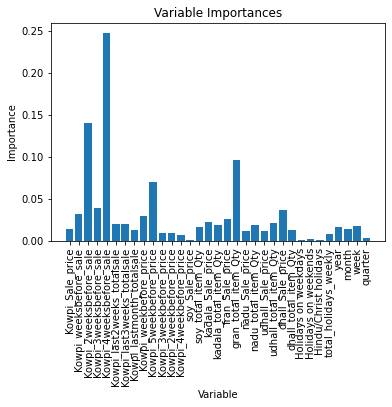

In [ ]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [None,5,10,15,20,30,35],
    'max_features': ['auto'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [1,2,3,4,5,6,7,8],
   'n_estimators': [10,50,100,200,500,600,700,800,900,1000]
}

# Create a based model
rf = RandomForestRegressor(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5,n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(train_features, train_labels)
grid_search.best_params_


Fitting 1 folds for each of 1680 candidates, totalling 1680 fits


c:\Users\muralee\anaconda3\envs\msc_project\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [      nan       nan       nan ... 0.7738726 0.7728539 0.7735338]
  warnings.warn(


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [ ]:
best_grid = grid_search.best_estimator_

predictions = best_grid.predict(train_features)

# Calculate the absolute errors
r2 = r2_score(train_labels.values.ravel(), predictions)
mae = mean_absolute_error(train_labels.values.ravel(), predictions)
mse = mean_squared_error(train_labels.values.ravel(), predictions)
rmse= np.sqrt(metrics.mean_squared_error(train_labels, predictions))

print('Train Mean Absolute Error:', round(mae, 2))
print('Train Mean Squared Error:', round(mse, 2))
print('Train RMSE:', round(rmse, 2))
print('Train R-squared scores:', round(r2, 2))

print('weekly mean sales :',df_final['Kowpi_total_item_Qty'].mean())

errors = abs(predictions - train_labels)
mape = 100 * (errors / train_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

#####

prediction = best_grid.predict(test_features)

# Calculate the absolute errors
r2 = r2_score(test_labels.values.ravel(), prediction)
mae = mean_absolute_error(test_labels.values.ravel(), prediction)
mse = mean_squared_error(test_labels.values.ravel(), prediction)
rmse= np.sqrt(metrics.mean_squared_error(test_labels, prediction))

print('\nTest Mean Absolute Error:', round(mae, 2))
print('Test Mean Squared Error:', round(mse, 2))
print('Test RMSE:', round(rmse, 2))
print('Test R-squared scores:', round(r2, 2))

print('weekly mean sales :', df_final['Kowpi_total_item_Qty'].mean())

errors = abs(prediction - test_labels)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Train Mean Absolute Error: 3.58
Train Mean Squared Error: 24.55
Train RMSE: 4.96
Train R-squared scores: 0.91
weekly mean sales : 26.404566666666653
Accuracy: 78.88 %.

Test Mean Absolute Error: 8.8
Test Mean Squared Error: 124.13
Test RMSE: 11.14
Test R-squared scores: 0.66
weekly mean sales : 26.404566666666653
Accuracy: 59.63 %.


Text(0.5, 0, 'n_estimators')

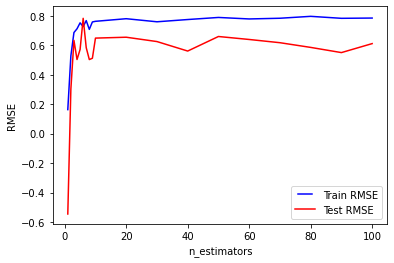

In [ ]:
#bootstrap=True,max_depth=5,max_features='auto',min_samples_leaf=1,min_samples_split=7,n_estimators=10

n_estimators=[1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]

train_results = []
test_results = []


for i in n_estimators:
    dt = RandomForestRegressor(n_estimators=i,bootstrap=True,max_depth=5,max_features='auto',min_samples_leaf=1,min_samples_split=7)
    dt.fit(train_features, train_labels) 
    #compute accuracy for train data
    predictions = dt.predict(train_features)
    errors = abs(predictions - train_labels)
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / train_labels)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    r2 = r2_score(train_labels.values.ravel(), predictions)
    rmse= np.sqrt(metrics.mean_squared_error(train_labels, predictions))
    #append results of accuracy
    train_results.append(r2)
    
    #now again for test data
    predictions = dt.predict(test_features)
    errors = abs(predictions - test_labels)
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / test_labels)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    r2 = r2_score(test_labels.values.ravel(), predictions)
    rmse = np.sqrt(metrics.mean_squared_error(test_labels, predictions))
    #append results of accuracy
    test_results.append(r2)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train RMSE')
line2, = plt.plot(n_estimators, test_results, 'r', label= 'Test RMSE')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
plt.xlabel('n_estimators')

Text(0.5, 0, 'n_estimators')

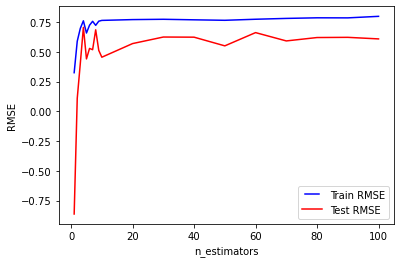

In [ ]:
#bootstrap=True,max_depth=5,max_features='auto',min_samples_leaf=1,min_samples_split=7,n_estimators=10

from matplotlib.legend_handler import HandlerLine2D
n_estimators = [1, 2, 3, 4, 5, 6, 7, 8, 9,
                10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

train_results = []
test_results = []


for i in n_estimators:
    dt = RandomForestRegressor(n_estimators=i, bootstrap=True, max_depth=5,
                               max_features='auto', min_samples_leaf=1, min_samples_split=7)
    dt.fit(train_features, train_labels)
    #compute accuracy for train data
    predictions = dt.predict(train_features)
    errors = abs(predictions - train_labels)
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / train_labels)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    r2 = r2_score(train_labels.values.ravel(), predictions)
    rmse = np.sqrt(metrics.mean_squared_error(train_labels, predictions))
    #append results of accuracy
    train_results.append(r2)

    #now again for test data
    predictions = dt.predict(test_features)
    errors = abs(predictions - test_labels)
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / test_labels)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    r2 = r2_score(test_labels.values.ravel(), predictions)
    rmse = np.sqrt(metrics.mean_squared_error(test_labels, predictions))
    #append results of accuracy
    test_results.append(r2)

line1, = plt.plot(n_estimators, train_results, 'b', label='Train RMSE')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test RMSE')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
plt.xlabel('n_estimators')


Text(0.5, 0, 'min_samples_leaf')

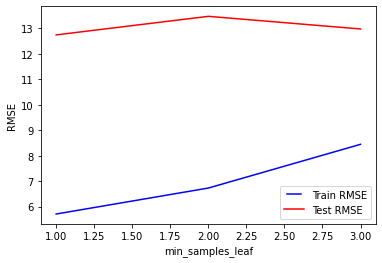

In [ ]:

min_samples_leaf=[1,2,3]

train_results = []
test_results = []


for i in min_samples_leaf:
    dt = RandomForestRegressor(min_samples_leaf=i,bootstrap=True,max_depth=10,max_features=10,min_samples_split=3,n_estimators=30)
    dt.fit(train_features, train_labels)    
    #compute accuracy for train data
    predictions = dt.predict(train_features)
    errors = abs(predictions - train_labels)
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / train_labels)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    r2 = r2_score(train_labels.values.ravel(), predictions)
    rmse= np.sqrt(metrics.mean_squared_error(train_labels, predictions))
    #append results of accuracy
    train_results.append(rmse)
    
    #now again for test data
    predictions = dt.predict(test_features)
    errors = abs(predictions - test_labels)
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / test_labels)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    r2 = r2_score(test_labels.values.ravel(), predictions)
    rmse= np.sqrt(metrics.mean_squared_error(test_labels, predictions))
    #append results of accuracy
    test_results.append(rmse)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leaf, train_results, 'b', label='Train RMSE')
line2, = plt.plot(min_samples_leaf, test_results, 'r', label= 'Test RMSE')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
plt.xlabel('min_samples_leaf')

Text(0.5, 0, 'max_features')

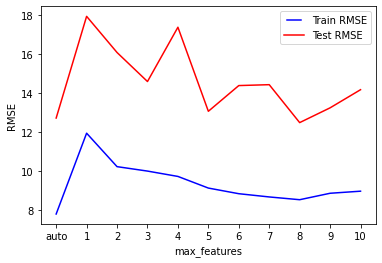

In [ ]:
max_features=['auto',1,2,3,4,5,6,7,8,9,10]

train_results = []
test_results = []


for i in max_features:
    dt = RandomForestRegressor(max_features=i,bootstrap=True,max_depth=5,min_samples_leaf=1,min_samples_split=7,n_estimators=10)
    dt.fit(train_features, train_labels)    
    #compute accuracy for train data
    predictions = dt.predict(train_features)
    errors = abs(predictions - train_labels)
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / train_labels)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    r2 = r2_score(train_labels.values.ravel(), predictions)
    rmse= np.sqrt(metrics.mean_squared_error(train_labels, predictions))
    #append results of accuracy
    train_results.append(rmse)
    
    #now again for test data
    predictions = dt.predict(test_features)
    errors = abs(predictions - test_labels)
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / test_labels)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    r2 = r2_score(test_labels.values.ravel(), predictions)
    rmse= np.sqrt(metrics.mean_squared_error(test_labels, predictions))
    #append results of accuracy
    test_results.append(rmse)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train RMSE')
line2, = plt.plot(max_features, test_results, 'r', label= 'Test RMSE')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
plt.xlabel('max_features')

Text(0.5, 0, 'max_depth')

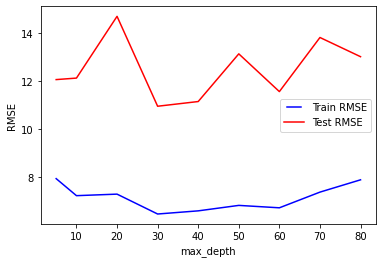

In [ ]:
max_depth=[None,5,10,20,30,40,50,60,70,80]

train_results = []
test_results = []


for i in max_depth:
    dt = RandomForestRegressor(max_depth=i,bootstrap=True,max_features='auto',min_samples_leaf=1,min_samples_split=7,n_estimators=10)
    dt.fit(train_features, train_labels)    
    #compute accuracy for train data
    predictions = dt.predict(train_features)
    errors = abs(predictions - train_labels)
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / train_labels)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    r2 = r2_score(train_labels.values.ravel(), predictions)
    rmse= np.sqrt(metrics.mean_squared_error(train_labels, predictions))
    #append results of accuracy
    train_results.append(rmse)
    
    #now again for test data
    predictions = dt.predict(test_features)
    errors = abs(predictions - test_labels)
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / test_labels)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    r2 = r2_score(test_labels.values.ravel(), predictions)
    rmse= np.sqrt(metrics.mean_squared_error(test_labels, predictions))
    #append results of accuracy
    test_results.append(rmse)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depth, train_results, 'b', label='Train RMSE')
line2, = plt.plot(max_depth, test_results, 'r', label= 'Test RMSE')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
plt.xlabel('max_depth')

In [ ]:

from sklearn.model_selection import train_test_split

labels = df_final['Kowpi_total_item_Qty']
features= df_final.drop(['Kowpi_total_item_Qty', 'S_Date'], axis = 1)

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2,random_state = 42)

feature_list = list(train_features.columns)
features=df_final.drop(['Kowpi_total_item_Qty', 'S_Date'],axis=1)

######

from sklearn.ensemble import RandomForestRegressor

rff = RandomForestRegressor(bootstrap=True,n_estimators=10, random_state=42,max_depth=5,max_features='auto',min_samples_leaf=1,min_samples_split=7)
rff.fit(train_features, train_labels);

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import sklearn.metrics as metrics

predictions = rff.predict(train_features)

# Calculate the absolute errors
r2 = r2_score(train_labels.values.ravel(), predictions)
mae = mean_absolute_error(train_labels.values.ravel(), predictions)
mse = mean_squared_error(train_labels.values.ravel(), predictions)
rmse= np.sqrt(metrics.mean_squared_error(train_labels, predictions))

print('Train Mean Absolute Error:', round(mae, 2))
print('Train Mean Squared Error:', round(mse, 2))
print('Train RMSE:', round(rmse, 2))
print('Train R-squared scores:', round(r2, 2))

print('weekly mean sales :',df_final['Kowpi_total_item_Qty'].mean())

errors = abs(predictions - train_labels)
mape = 100 * (errors / train_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


predictions = rff.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)


r2 = r2_score(test_labels.values.ravel(), predictions)
mae = mean_absolute_error(test_labels.values.ravel(), predictions)
mse = mean_squared_error(test_labels.values.ravel(), predictions)
rmse= np.sqrt(metrics.mean_squared_error(test_labels, predictions))

print('\nTest Mean Absolute Error:', round(mae, 2))
print('Test Mean Squared Error:', round(mse, 2))
print('Test RMSE:', round(rmse, 2))
print('Test R-squared scores:', round(r2, 2))

print('weekly mean sales :',df_final['Kowpi_total_item_Qty'].mean())


mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Train Mean Absolute Error: 5.83
Train Mean Squared Error: 62.47
Train RMSE: 7.9
Train R-squared scores: 0.77
weekly mean sales : 26.404566666666653
Accuracy: 64.99 %.

Test Mean Absolute Error: 7.92
Test Mean Squared Error: 102.73
Test RMSE: 10.14
Test R-squared scores: 0.72
weekly mean sales : 26.404566666666653
Accuracy: 63.62 %.


In [ ]:
# Get numerical feature importances
importances = list(rff.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:40} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Kowpi_4weeksbefore_sale                  Importance: 0.29
Variable: Kowpi_2weeksbefore_sale                  Importance: 0.19
Variable: gran_total_item_Qty                      Importance: 0.09
Variable: Kowpi_weeksbefore_sale                   Importance: 0.06
Variable: dhall_Sale_price                         Importance: 0.06
Variable: Kowpi_5weekbefore_price                  Importance: 0.05
Variable: Kowpi_last3weeks_totalsale               Importance: 0.03
Variable: Kowpi_lastmonth_totalsale                Importance: 0.03
Variable: fran_Sale_price                          Importance: 0.03
Variable: week                                     Importance: 0.03
Variable: Kowpi_3weeksbefore_sale                  Importance: 0.02
Variable: nadu_total_item_Qty                      Importance: 0.02
Variable: dhall_total_item_Qty                     Importance: 0.02
Variable: year                                     Importance: 0.02
Variable: Kowpi_Sale_price                      

In [ ]:
from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import partial_dependence
from sklearn.ensemble import RandomForestRegressor

c:\Users\muralee\anaconda3\envs\msc_project\lib\site-packages\sklearn\inspection\_plot\partial_dependence.py:735: UserWarning: Attempting to set identical bottom == top == 26.177934027777773 results in singular transformations; automatically expanding.
  ax.set_ylim(self.pdp_lim[1])


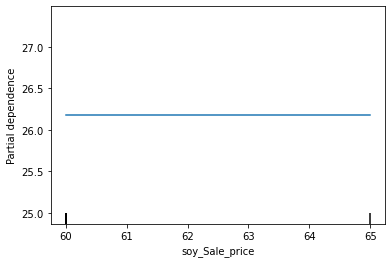

In [ ]:
plot_partial_dependence(rff, train_features, features = ['soy_Sale_price'], percentiles = [0,1]);

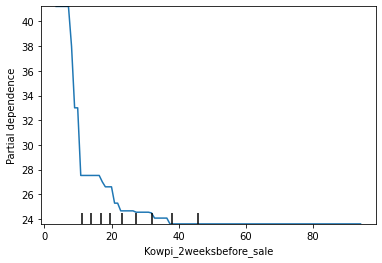

In [ ]:
plot_partial_dependence(rff, train_features, features = ['Kowpi_2weeksbefore_sale'], percentiles = [0,1]);

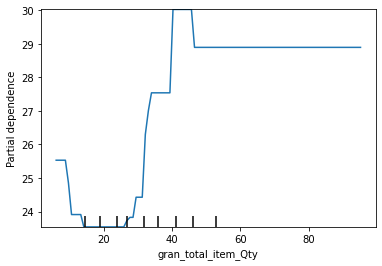

In [ ]:
plot_partial_dependence(rff, train_features, features = ['gran_total_item_Qty'], percentiles = [0,1]);

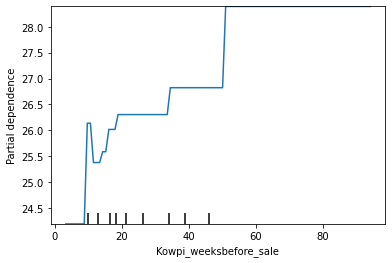

In [ ]:
plot_partial_dependence(rff, train_features, features = ['Kowpi_weeksbefore_sale'], percentiles = [0,1]);

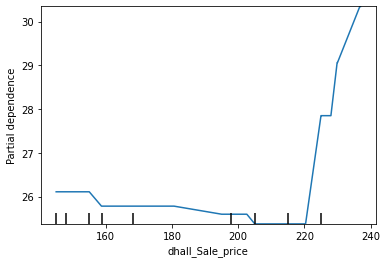

In [ ]:
plot_partial_dependence(rff, train_features, features = ['dhall_Sale_price'], percentiles = [0,1]);

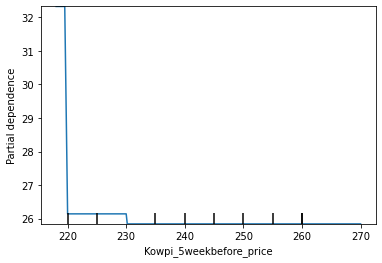

In [ ]:
plot_partial_dependence(rff, train_features, features = ['Kowpi_5weekbefore_price'], percentiles = [0,1]);

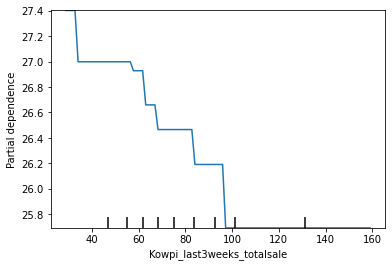

In [ ]:
plot_partial_dependence(rff, train_features, features = ['Kowpi_last3weeks_totalsale'], percentiles = [0,1]);

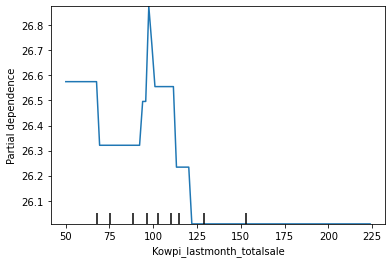

In [ ]:
plot_partial_dependence(rff, train_features, features = ['Kowpi_lastmonth_totalsale'], percentiles = [0,1]);

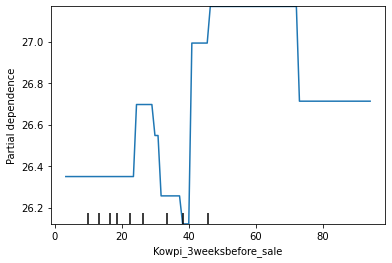

In [ ]:
plot_partial_dependence(rff, train_features, features = ['Kowpi_3weeksbefore_sale'], percentiles = [0,1]);

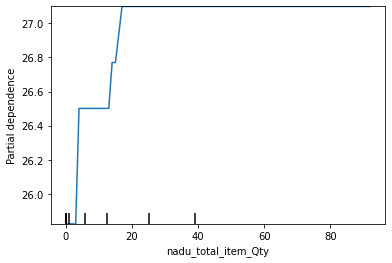

In [ ]:
plot_partial_dependence(rff, train_features, features = ['nadu_total_item_Qty'], percentiles = [0,1]);

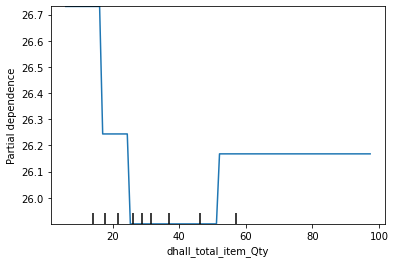

In [ ]:
plot_partial_dependence(rff, train_features, features = ['dhall_total_item_Qty'], percentiles = [0,1]);

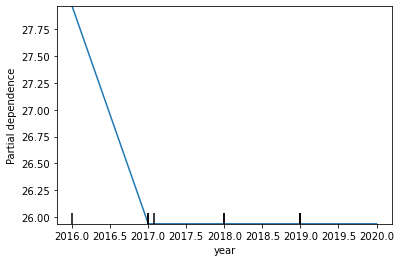

In [ ]:
plot_partial_dependence(rff, train_features, features = ['year'], percentiles = [0,1]);